# Assignment 2

## A bit of info before you start.


> ***First and foremost, dont use AI to code. Use it to understand and then write code yourself. Use AI to verify if the code you wrote it correct, that will help you learn far far more.***

> ***Implement Stuff from sratch. Use cv2 functions only when numpy implementation can be extremely tedious.***



You will need to use your own image for this assignment, which you need to import into here.
If you cant fetch your image from any APIs that dont need credentials, then :
To preserve an image in Google Colab without a continuous runtime or using Google Drive, you can use base64 string encoding of images ( its really simple )

First, begin by normally uploading the image into the contents folders as you normally do in colab or fetch it using Drive or any API.

To get the base64 string :
```
import base64
with open("your_image.jpg", "rb") as img_file:
    print(base64.b64encode(img_file.read()).decode())
```

Note that the base64 string is a very long string, click on the three dot icon to the left of the current code cell and click on <code> Copy Cell Output </code> to easily copy it to your clipboard.

Then, to embed the string into your Jupyter Notebook :
```
from PIL import Image
import io
import base64
import matplotlib.pyplot as plt
import numpy as np

# PASTE BASE64 STRING HERE
base64_image = "iVBORw0K..."  # long base64 string

img_data = base64.b64decode(base64_image)
img = Image.open(io.BytesIO(img_data))

plt.imshow(img)
plt.axis("off")
```
The string is really long so, use a multiline string in python ( syntax : """ """ )

Otherwise, you can also choose to use any API ( try researching on https://picsum.photos/ )

## Part A

1. Grayscale Histogram - load you image and then write a function <code>gray_histogram</code>. Details below :
```
Requirements:
Function Signature : gray_histogram(gray_img)
1. Input is a non-normalized grayscale image (values 0–255)
2. Use pure NumPy loops
3. No OpenCV histogram functions allowed
```
Then plot using matplotlib.


2. RGB Histogram - do the same for an RGB image, final result should look like the one attached in the lecture slides. But, ONLY using Numpy. Plot using matplotlib. ( If you get 1st part, this is very easy )


Saving image_3.jpg to image_3 (1).jpg
Uploaded file: image_3 (1).jpg


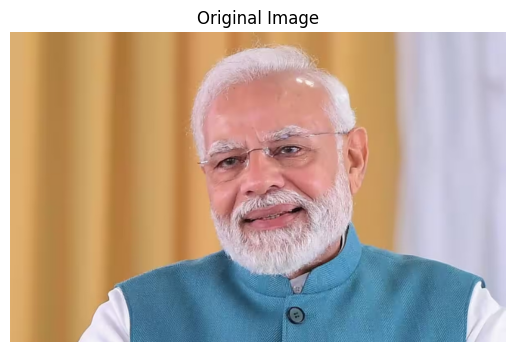

In [3]:
from google.colab import files

# Upload image manually
uploaded = files.upload()

# Get the uploaded filename automatically
filename = next(iter(uploaded))
print("Uploaded file:", filename)

import numpy as np
import cv2
import matplotlib.pyplot as plt

# Read image (cv2 loads in BGR)
img = cv2.imread(filename)

# Convert to RGB for proper display
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Show image
plt.imshow(img_rgb)
plt.axis("off")
plt.title("Original Image")
plt.show()


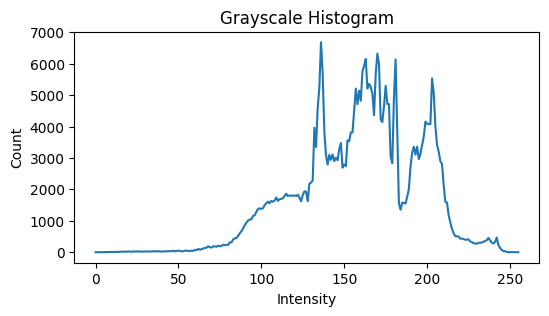

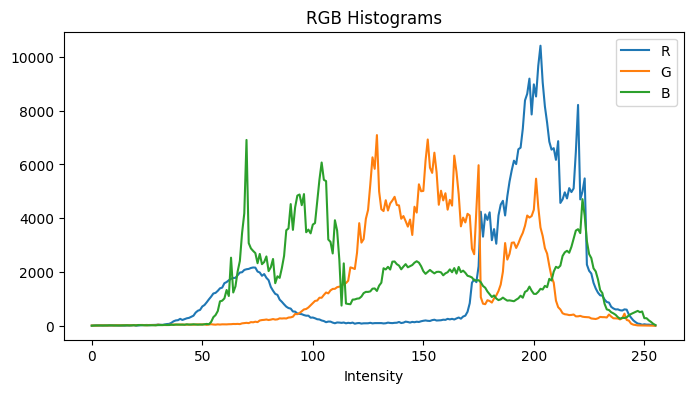

In [4]:
# convert to grayscale
def rgb_to_gray(img_rgb):
    # standard luminance
    r,g,b = img_rgb[...,0], img_rgb[...,1], img_rgb[...,2]
    gray = (0.299*r + 0.587*g + 0.114*b).astype(np.uint8)
    return gray

# A.1: grayscale histogram using pure loops
def gray_histogram(gray_img):
    hist = np.zeros(256, dtype=np.int64)
    # loop over flattened pixels
    for v in gray_img.ravel():
        hist[int(v)] += 1
    return hist

# A.2: RGB histograms using loops (per-channel)
def rgb_histogram(img_rgb):
    hist_r = np.zeros(256, dtype=np.int64)
    hist_g = np.zeros(256, dtype=np.int64)
    hist_b = np.zeros(256, dtype=np.int64)
    # iterate over pixels (flattened with step 3)
    flat = img_rgb.reshape(-1,3)
    for pix in flat:
        hist_r[int(pix[0])] += 1
        hist_g[int(pix[1])] += 1
        hist_b[int(pix[2])] += 1
    return hist_r, hist_g, hist_b

# demonstrate and plot
gray = rgb_to_gray(img_rgb)
g_hist = gray_histogram(gray)
r_hist, g_hist_c, b_hist = rgb_histogram(img_rgb)

# plot grayscale
plt.figure(figsize=(6,3))
plt.plot(g_hist)
plt.title("Grayscale Histogram")
plt.xlabel("Intensity"); plt.ylabel("Count")
plt.show()

# plot RGB hist
plt.figure(figsize=(8,4))
plt.plot(r_hist, label='R'); plt.plot(g_hist_c, label='G'); plt.plot(b_hist, label='B')
plt.title("RGB Histograms"); plt.xlabel("Intensity"); plt.legend()
plt.show()


## Part B

#### RGB to HSV ( only Numpy ofc )
Write a function <code>rgb_to_hsv</code> that takes a 0-255 ( not normalised ) RGB image and returns an HSV image ( also not normalised ).

**Note :** Research for the formulas, maybe ask some AI to explain you the algo and formulas ( NOT to give you the code, seriously youre not gonna learn anything if you do that )

The output should be in a format that is compatible with OpenCV cvtColor. Read the documentation to find out any Hue scaling etc.
Finally, use your function and test it by using cv2.cvtColor to convert your function output into RGB again and display it. Your image will appear the same after reconversion into RGB.

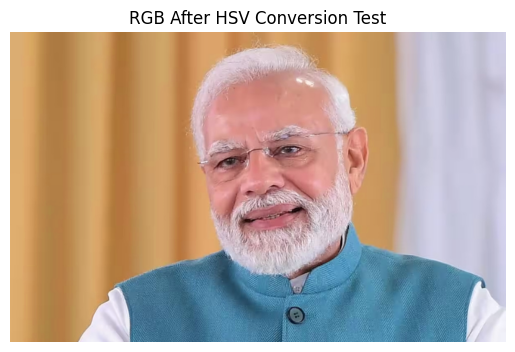

In [5]:
def rgb_to_hsv(img_rgb):
    # convert to float 0-1
    r = img_rgb[:,:,0].astype(np.float32) / 255
    g = img_rgb[:,:,1].astype(np.float32) / 255
    b = img_rgb[:,:,2].astype(np.float32) / 255

    maxc = np.maximum(np.maximum(r, g), b)
    minc = np.minimum(np.minimum(r, g), b)
    diff = maxc - minc

    H = np.zeros_like(maxc)
    S = np.zeros_like(maxc)
    V = maxc * 255

    # saturation
    for i in range(img_rgb.shape[0]):
        for j in range(img_rgb.shape[1]):
            if maxc[i,j] == 0:
                S[i,j] = 0
            else:
                S[i,j] = (diff[i,j] / maxc[i,j]) * 255

    # hue calculation
    for i in range(img_rgb.shape[0]):
        for j in range(img_rgb.shape[1]):
            if diff[i,j] == 0:
                H[i,j] = 0
            else:
                if maxc[i,j] == r[i,j]:
                    H[i,j] = (60 * ((g[i,j] - b[i,j]) / diff[i,j])) % 360
                elif maxc[i,j] == g[i,j]:
                    H[i,j] = (60 * ((b[i,j] - r[i,j]) / diff[i,j]) + 120)
                else:
                    H[i,j] = (60 * ((r[i,j] - g[i,j]) / diff[i,j]) + 240)

    # OpenCV scaling: H in [0,179]
    H = (H / 2).astype(np.uint8)
    S = S.astype(np.uint8)
    V = V.astype(np.uint8)

    hsv = np.stack([H, S, V], axis=2)
    return hsv

# test
hsv_img = rgb_to_hsv(img_rgb)
rgb_back = cv2.cvtColor(hsv_img, cv2.COLOR_HSV2RGB)

plt.imshow(rgb_back)
plt.axis("off")
plt.title("RGB After HSV Conversion Test")
plt.show()


## Part C

####Create 2 filters.
1. Give them any name of your choice ( I look forward to receiveing some hilarious names in submissions )
2. Clearly state what all you are doing in the filter. Like any saturation boost, etc. ( Be creative, think about stuff like adding a blue layer or making the image look foggy )
3. Suggest what kind of images is your filter good for ( maybe beach images, or rainforest etc. )
4. Comment your code showing where you implemented what part of your filter
5. The filters should be in form of functions that take 0-255 RGB image and return 0-255 RGB image.
6. Give them an appropriate input according to your filter design, and display the original and filtered image ( Be sure to choose the image such that the effect of filter makes clear difference, preferably improvement in the image ). You can embed in 2 new images ( or even more if your filter is worthy bragging about, I dont mind, but display the original and outputs side by side )

**IMPORTANT FILTER DESIGN NOTES :**

The filter must include at least two color modifications, such as:
1. contrast adjustment
2. brightness shift
3. saturation change
4. gamma correction
5. hue rotation
6. vibrance boost
7. custom color tint
8. split-toning (different color for shadows & highlights)
9. channel mixing

Implement using NumPy + cv2 only.

Write a small note (2–3 lines) explaining:
1. why you chose those modifications
2. why they suit the image

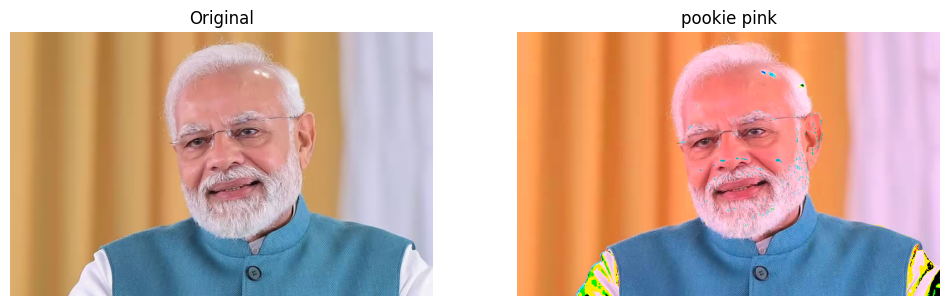

In [8]:
#  POOKIE PINK , can be used to become a pookie (just like modi ji) . adds a pink tint to the picture which makes it more cute.
def pookie_pink(img):
    # convert to float
    out = img.astype(np.float32)

    # 1) brightness shift (+15)
    out = out + 15

    # 2) saturation boost (using HSV)
    hsv = cv2.cvtColor(out.astype(np.uint8), cv2.COLOR_RGB2HSV).astype(np.float32)
    hsv[:,:,1] = np.clip(hsv[:,:,1] * 1.25, 0, 255)   # 25% more saturation

    # 3) custom pink tint (increase Red slightly, slight drop in Green)
    rgb = cv2.cvtColor(hsv.astype(np.uint8), cv2.COLOR_HSV2RGB).astype(np.float32)
    rgb[:,:,0] = rgb[:,:,0] * 1.12   # R +12%
    rgb[:,:,1] = rgb[:,:,1] * 0.95   # G -5%

    return np.clip(rgb, 0, 255).astype(np.uint8)

# Call the function and assign the result to pink_img BEFORE plotting
pink_img = pookie_pink(img_rgb)

plt.figure(figsize=(12,6))
plt.subplot(1,2,1); plt.imshow(img_rgb); plt.title("Original"); plt.axis("off")
plt.subplot(1,2,2); plt.imshow(pink_img); plt.title("pookie pink"); plt.axis("off")
plt.show()


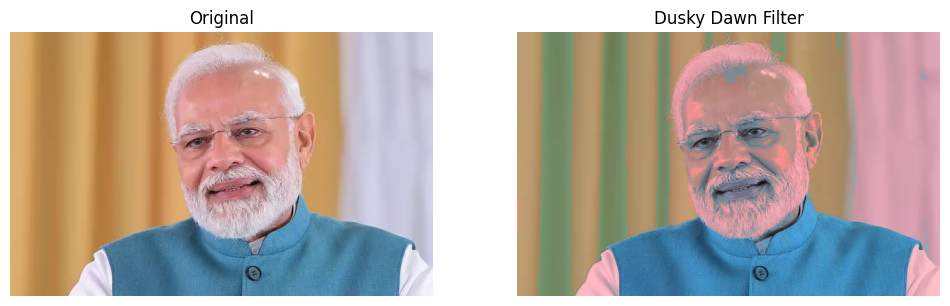

In [14]:
# DUSKY DAWN FILTER , a bossy and rowdy filter , gives gangsta vibes , a bit dull and teal shades make it look classic .
def dusky_dawn(img):
    out = img.astype(np.float32)

    # Reduce brightness for moody look
    out = out - 20

    # Reduce saturation for dull and cinematic tone
    hsv = cv2.cvtColor(np.clip(out,0,255).astype(np.uint8), cv2.COLOR_RGB2HSV).astype(np.float32)
    hsv[:,:,1] = hsv[:,:,1] * 0.80   # more desaturated
    out = cv2.cvtColor(hsv.astype(np.uint8), cv2.COLOR_HSV2RGB).astype(np.float32)

    # grayscale mask for tone separation
    gray = cv2.cvtColor(np.clip(out,0,255).astype(np.uint8), cv2.COLOR_RGB2GRAY)

    # STRONG TEAL SHADOWS
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            if gray[i,j] < 140:
                out[i,j,2] *= 1.35   # boosts blue
                out[i,j,1] *= 1.18   # boosts green for teal
                out[i,j,0] *= 0.70   # red reduction for teal

    # STRONG ORANGE HIGHLIGHTS
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            if gray[i,j] > 170:
                out[i,j,0] *= 1.25   # boosting red for orange tone
                out[i,j,1] *= 0.90   # slightly reducing green
                out[i,j,2] *= 0.92   # reduce blue -> makes red stand out → ORANGE


    # Slight contrast reduction to keep dull mood
    out = (out - 128) * 0.85 + 128


    return np.clip(out, 0, 255).astype(np.uint8)




dusky_img = dusky_dawn(img_rgb)

plt.figure(figsize=(12,6))
plt.subplot(1,2,1); plt.imshow(img_rgb); plt.title("Original"); plt.axis("off")
plt.subplot(1,2,2); plt.imshow(dusky_img); plt.title("Dusky Dawn Filter"); plt.axis("off")
plt.show()


## Part D

#### White Balance Function
Write a function <code>white_patch_balance(img_rgb)</code> that takes a 0-255 RGB image and then returns a White Patch Method Balanced 0-255 RBG image. Use Numpy only to keep track of the brightest pixel and then scale the entire image with the factor you find. Display the original and output image.

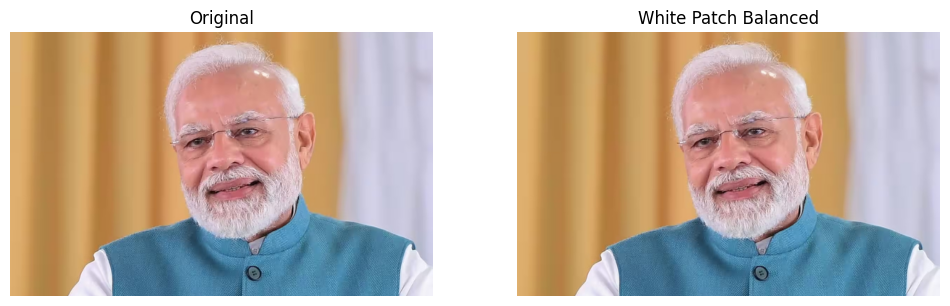

In [15]:
def white_patch_balance(img_rgb):

    # Converting to float
    img_f = img_rgb.astype(np.float32)

   # finding brightness of each channel
    max_r = np.max(img_f[:,:,0])
    max_g = np.max(img_f[:,:,1])
    max_b = np.max(img_f[:,:,2])

    # scaling brightness channel
    img_f[:,:,0] = img_f[:,:,0] * (255.0 / max_r)
    img_f[:,:,1] = img_f[:,:,1] * (255.0 / max_g)
    img_f[:,:,2] = img_f[:,:,2] * (255.0 / max_b)

    # Clip values back to valid 8-bit range
    return np.clip(img_f, 0, 255).astype(np.uint8)

wb_img = white_patch_balance(img_rgb)

plt.figure(figsize=(12,6))
plt.subplot(1,2,1); plt.imshow(img_rgb); plt.title("Original"); plt.axis("off")
plt.subplot(1,2,2); plt.imshow(wb_img); plt.title("White Patch Balanced"); plt.axis("off")
plt.show()


## Bonus - Part E

#### Create a White Balance Slider

Here's a link to a video of how my phone camera's White Balance feature works.
https://photos.app.goo.gl/zArkv5UcWiRV96JA9

Now, you will need to create a function <code>white_balance(img_rgb, value)</code>

It takes the img_rgb ( 0-255 RGB image ) and value ( 0-1 decimal number ).
1. value = 0 outputs the coldest version of the image
2. value = 0.5 is the original image itself
3. value = 1 is the warmest version of the image

The output should be the processed 0-255 RGB image. Display the original and processed image.

Try to make it look as good as possible. I dont expect you guys to copy my phone and create industry level outputs, but work hard and experiment. You can include even failed tries or what you felt was not satisfactory ( that will show how much effort you put in )

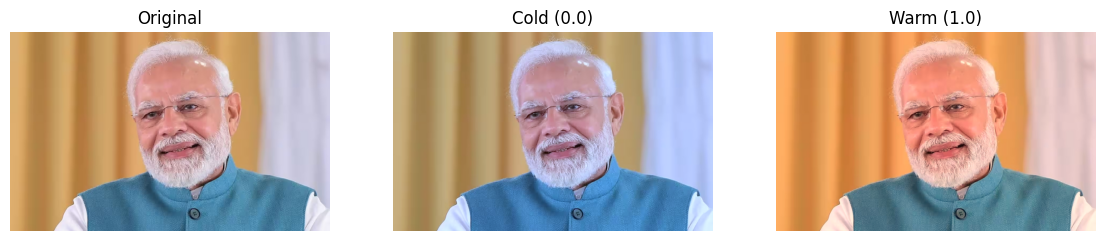

In [17]:
def white_balance(img_rgb, value):

    # Convert to float for safe scaling
    out = img_rgb.astype(np.float32)

   # First making sure how much red and blue should change at both the extremes
    # Coldest setting when the value is 0
    cold_red_scale   = 0.90   # slightly reduce red
    cold_blue_scale  = 1.15   # boost blue

    # Warmest setting when the value is 1
    warm_red_scale   = 1.15   # boost red
    warm_blue_scale  = 0.90   # reduce blue


    # combining both cold and warm conditions on the basis of scale
    r_scale = (1 - value) * cold_red_scale  +  value * warm_red_scale

    # scaling blue for the current value
    b_scale = (1 - value) * cold_blue_scale +  value * warm_blue_scale

   # applying temperature adjustment used a bit AI for help
    out[:,:,0] = out[:,:,0] * r_scale   # Red channel
    out[:,:,2] = out[:,:,2] * b_scale   # Blue channel

    # Cliping to valid range
    return np.clip(out, 0, 255).astype(np.uint8)


white_img = white_balance(img_rgb, 0.0)   # cold image
white_img2 = white_balance(img_rgb, 1.0) # warm image

plt.figure(figsize=(14,6))
plt.subplot(1,3,1); plt.imshow(img_rgb);        plt.title("Original"); plt.axis("off")
plt.subplot(1,3,2); plt.imshow(white_img);   plt.title("Cold (0.0)"); plt.axis("off")
plt.subplot(1,3,3); plt.imshow(white_img2);  plt.title("Warm (1.0)"); plt.axis("off")
plt.show()
